# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?"  
# create setting and desired_keys
units="Imperial"
url=base_url+"&appid="+weather_api_key+"&units="+units
print(url)

http://api.openweathermap.org/data/2.5/weather?&appid=beb84582950723bb3037b2ee53f53747&units=Imperial


In [86]:
requests.get(url+"&q="+cities[0]).json()



{'coord': {'lon': 30.79, 'lat': 59.7},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 49.66,
  'feels_like': 47.88,
  'temp_min': 48.99,
  'temp_max': 50,
  'pressure': 1011,
  'humidity': 93},
 'visibility': 2600,
 'wind': {'speed': 2.24, 'deg': 110},
 'clouds': {'all': 90},
 'dt': 1604005593,
 'sys': {'type': 1,
  'id': 8926,
  'country': 'RU',
  'sunrise': 1604034792,
  'sunset': 1604066856},
 'timezone': 10800,
 'id': 546105,
 'name': 'Nikolskoye',
 'cod': 200}

In [87]:

# set lists for the dataframe
city_list = []
cloudiness = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []
print(url)
# set initial count quantities for organization
count_one = 0
set_one = 0

# loops for creating dataframe columns
for city in cities:
    query_url=url+"&q="+city
    response = requests.get(query_url).json()
    if count_one < 50:
        count_one += 1
        #set_one += 1
        #city_list.append(city)
    else:
        set_one += 1
        count_one=0
        #city_list.append(city)


    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_list.append(city)
       # print(dates)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")


    except:
    #Exception:
        pass
        #print("City not found. Skipping...")
        print("------------------------------\nData Retrieval Complete\n------------------------------")

http://api.openweathermap.org/data/2.5/weather?&appid=beb84582950723bb3037b2ee53f53747&units=Imperial
Processing Record 1 of Set 0 | nikolskoye
Processing Record 2 of Set 0 | tasiilaq
Processing Record 3 of Set 0 | taiyuan
Processing Record 4 of Set 0 | ribeira grande
Processing Record 5 of Set 0 | bethel
Processing Record 6 of Set 0 | hermanus
Processing Record 7 of Set 0 | saint george
Processing Record 8 of Set 0 | yaan
Processing Record 9 of Set 0 | albany
Processing Record 10 of Set 0 | aktau
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 12 of Set 0 | mandalgovi
Processing Record 13 of Set 0 | hilo
Processing Record 14 of Set 0 | tuktoyaktuk
Processing Record 15 of Set 0 | ushuaia
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 17 of Set 0 | khromtau
Processing Record 18 of Set 0 | poum
Processing Record 19 of Set 0 | dikson
Processing Record 20 of Set 0 | mataura
Proc

Processing Record 23 of Set 3 | albanel
Processing Record 24 of Set 3 | erenhot
Processing Record 25 of Set 3 | kaitangata
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 27 of Set 3 | carutapera
Processing Record 28 of Set 3 | berezovyy
Processing Record 29 of Set 3 | clyde river
Processing Record 30 of Set 3 | salalah
Processing Record 31 of Set 3 | zhanaozen
Processing Record 32 of Set 3 | bathsheba
Processing Record 33 of Set 3 | ugoofaaru
Processing Record 34 of Set 3 | los llanos de aridane
Processing Record 35 of Set 3 | constitucion
Processing Record 36 of Set 3 | novopokrovka
Processing Record 37 of Set 3 | kapaa
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 39 of Set 3 | puerto baquerizo moreno
Processing Record 40 of Set 3 | tuatapere
Processing Record 41 of Set 3 | dali
Processing Record 42 of Set 3 | fomboni
Processing Record 43 of Set 3 | sola
Processing Recor

------------------------------
Data Retrieval Complete
------------------------------
Processing Record 5 of Set 7 | hobyo
Processing Record 6 of Set 7 | coquimbo
Processing Record 7 of Set 7 | nyimba
Processing Record 8 of Set 7 | loandjili
Processing Record 9 of Set 7 | hambantota
Processing Record 10 of Set 7 | sambava
Processing Record 11 of Set 7 | oyama
Processing Record 12 of Set 7 | puerto colombia
Processing Record 13 of Set 7 | koge
Processing Record 14 of Set 7 | dingle
Processing Record 15 of Set 7 | viking
Processing Record 16 of Set 7 | placerville
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 18 of Set 7 | templin
Processing Record 19 of Set 7 | mattru
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 21 of Set 7 | viedma
Processing Record 22 of Set 7 | slavuta
Processing Record 23 of Set 7 | mount gambier
Processing Record 24 of Set 7 | kuala pilah
-----------

Processing Record 35 of Set 10 | usinsk
Processing Record 36 of Set 10 | chalus
Processing Record 37 of Set 10 | costinesti
Processing Record 38 of Set 10 | hovd
Processing Record 39 of Set 10 | ust-ilimsk
Processing Record 40 of Set 10 | lufilufi
Processing Record 41 of Set 10 | port lincoln
Processing Record 42 of Set 10 | waipawa
Processing Record 43 of Set 10 | sembe
Processing Record 44 of Set 10 | general roca
Processing Record 45 of Set 10 | encheng
Processing Record 46 of Set 10 | ypsonas
Processing Record 47 of Set 10 | jodhpur
Processing Record 48 of Set 10 | pacific grove
Processing Record 49 of Set 10 | raudeberg
Processing Record 50 of Set 10 | portoferraio
Processing Record 0 of Set 11 | otradnoye
Processing Record 1 of Set 11 | clarence town
Processing Record 2 of Set 11 | kavieng
Processing Record 3 of Set 11 | rosetta
Processing Record 4 of Set 11 | plettenberg bay
Processing Record 5 of Set 11 | hurricane
------------------------------
Data Retrieval Complete
--------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
city_data = ({
     'City':city_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':dates,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
                                 })
city_df=pd.DataFrame(city_data)
#city_df=city.rename_axis('City ID')

city_df.to_csv(output_data_file)
city_df.head()
#city_df.count()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,nikolskoye,90,RU,1604005593,93,59.70,30.79,50.00,2.24
1,tasiilaq,100,GL,1604005415,96,65.61,-37.64,26.56,7.16
2,taiyuan,0,CN,1604005594,57,37.87,112.56,33.80,1.63
3,ribeira grande,75,PT,1604005594,94,38.52,-28.70,68.00,19.46
4,bethel,100,US,1604005377,96,41.37,-73.41,45.00,3.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [93]:
#  Get the indices of cities that have humidity over 100%.
outliers=city_df.loc[city_df['Humidity'] >= 100]
outliers


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
42,jamestown,90,US,1604005316,100,42.10,-79.24,45.00,8.05
51,naujamiestis,40,LT,1604005598,100,55.69,24.15,44.60,5.23
59,aanekoski,90,FI,1604005599,100,62.69,25.82,42.80,4.70
92,ketchikan,40,US,1604005528,100,55.34,-131.65,42.80,4.25
114,turan,75,VN,1604005604,100,16.07,108.22,77.00,2.95
240,carnarvon,90,AU,1604005613,100,-24.87,113.63,69.80,4.70
275,port macquarie,1,AU,1604005369,100,-31.43,152.92,55.99,3.76
296,yzeure,90,FR,1604005618,100,46.56,3.35,57.99,3.36
347,keuruu,90,FI,1604005623,100,62.27,24.70,46.00,6.93
372,phek,99,IN,1604005625,100,25.67,94.50,58.35,1.57


In [94]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df=pd.DataFrame(city_df.loc[city_df['Humidity'] < 100])
clean_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,nikolskoye,90,RU,1604005593,93,59.70,30.79,50.00,2.24
1,tasiilaq,100,GL,1604005415,96,65.61,-37.64,26.56,7.16
2,taiyuan,0,CN,1604005594,57,37.87,112.56,33.80,1.63
3,ribeira grande,75,PT,1604005594,94,38.52,-28.70,68.00,19.46
4,bethel,100,US,1604005377,96,41.37,-73.41,45.00,3.00
...,...,...,...,...,...,...,...,...,...
548,okhotsk,100,RU,1604005641,97,59.38,143.30,27.18,8.81
549,moyale,91,KE,1604005641,85,3.52,39.06,68.13,2.66
550,japura,76,ID,1604005641,96,-0.32,102.35,73.63,1.99
552,buala,100,SB,1604005641,81,-8.14,159.59,79.95,6.44


In [95]:

clean_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
count,532.000000,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000
mean,52.597744,1.604006e+09,73.063910,21.442688,22.114981,57.676654,7.989925
std,40.943761,8.474814e+01,20.789132,32.887768,90.481592,23.324808,5.841111
min,0.000000,1.604005e+09,11.000000,-54.800000,-179.170000,-12.770000,0.130000
25%,1.750000,1.604006e+09,61.750000,-4.790000,-59.960000,42.800000,3.457500
50%,63.000000,1.604006e+09,78.000000,25.910000,30.815000,64.075000,6.790000
75%,95.000000,1.604006e+09,90.000000,49.842500,100.342500,76.917500,10.807500
max,100.000000,1.604006e+09,99.000000,78.220000,179.320000,94.080000,33.330000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [150]:

date = "10/31/2020"

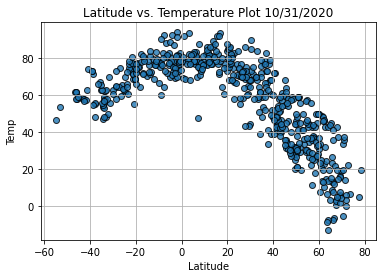

In [173]:
plt.scatter(lat,max_temp, edgecolor="black",linewidths=1,marker="o",alpha=.8,label="Cities")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title('Latitude vs. Temperature Plot '+ str(date) )
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Latitude vs. Temperature Plot.png")



This code plots the two variables latitude and temperature to see if there is a realtionship. We can see that as latitude increases the temperature decreases.

## Latitude vs. Humidity Plot

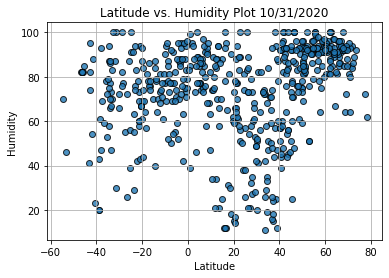

In [176]:
plt.scatter(lat,humidity, edgecolor="black",linewidths=1,marker="o",alpha=.8,label="Cities")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot ' + str(date))
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Latitude vs. Humidity Plot.png")

This code plots the two variables latitude and humidity to see if there is a realtionship. We can not clearly see an association but there is a large clump of data around the 90 % humidity and high latitude.

## Latitude vs. Cloudiness Plot

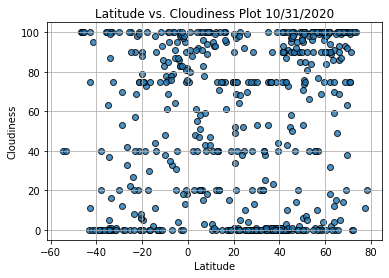

In [177]:
plt.scatter(lat,cloudiness, edgecolor="black",linewidths=1,marker="o",alpha=.8,label="Cities")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot '+date )
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Latitude vs. Cloudiness Plot.png")



This code plots the two variables latitude and cloudiness to see if there is a realtionship. I think the data shows an interesting trend of high concentrations at high cloudiness and low cloudiness with the data spread out between latitude. 

## Latitude vs. Wind Speed Plot

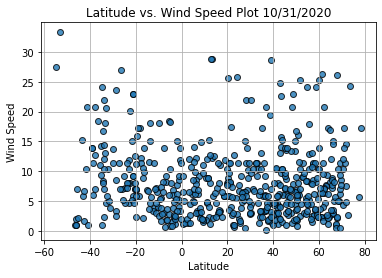

In [179]:
plt.scatter(lat,wind_speed, edgecolor="black",linewidths=1,marker="o",alpha=.8,label="Cities")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed Plot '+date )

plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Latitude vs. Wind Speed.png")



This code plots the two variables latitude and max speed to see if there is a realtionship. The data seems more concentrated at higher latitude and low wind speeds.

## Linear Regression

In [155]:
north_df = city_df.loc[city_df['Lat'] >= 0,:]
south_df = city_df.loc[city_df['Lat'] <= 0,:]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

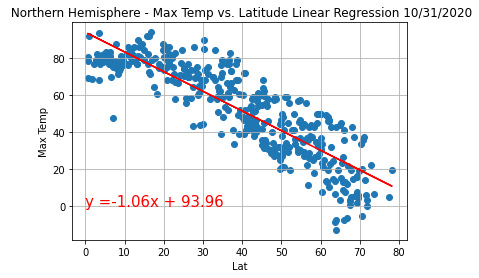

In [188]:

y_value=north_df['Max Temperature']
#x_value=city_data['Lat']
x_value=north_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,y,"r-")
plt.annotate(line,(0,0),fontsize=15, color='red')
plt.title(" Northern Hemisphere - Max Temp vs. Latitude Linear Regression "+ date)
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Northern Hemisphere - Max Temp vs. Latitude Linear Regressio.png")



This plot shows a negative relationship between temperature and latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

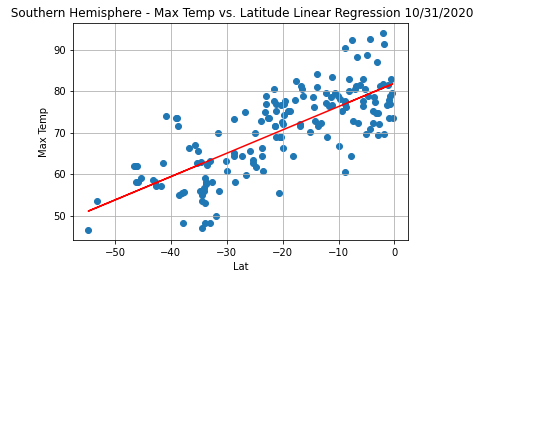

In [189]:

y_value=south_df['Max Temperature']
x_value=south_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,y,"-r")
plt.annotate(line,(0,0),fontsize=15, color='red')
plt.title(" Southern Hemisphere - Max Temp vs. Latitude Linear Regression " + date)
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



this plot shows a positive relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

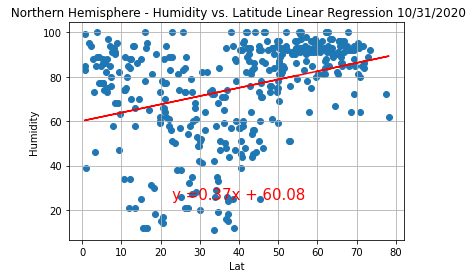

In [190]:

y_value=north_df['Humidity']
#x_value=city_data['Lat']
x_value=north_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept


plt.scatter(x_value,y_value)
plt.plot(x_value,y,"r-")
plt.annotate(line,(23,25),fontsize=15, color='red')
plt.title(" Northern Hemisphere - Humidity vs. Latitude Linear Regression " + date)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")



this plot shows a positive relationship but not very strong. It also has a pretty flat slope.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

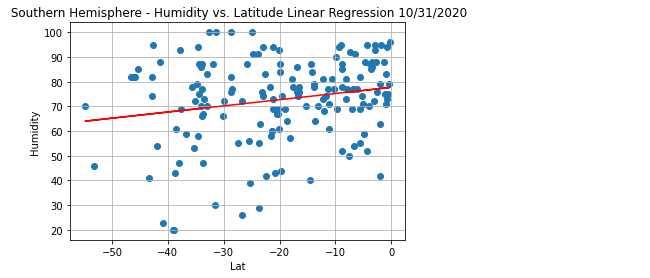

In [191]:
y_value=south_df['Humidity']
x_value=south_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept


plt.scatter(x_value,y_value)
plt.plot(x_value,y,"r-")
plt.annotate(line,(23,25),fontsize=15, color='red')
plt.title(" Southern Hemisphere - Humidity vs. Latitude Linear Regression " + date)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Southern Hemisphere - Humidity vs. Latitude Linear Regressionn.png")



this plot does not show a strong correlation between the two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

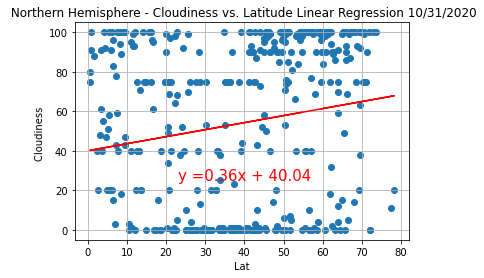

In [192]:

y_value=north_df['Cloudiness']
x_value=north_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept


plt.scatter(x_value,y_value)
plt.plot(x_value,y,"r-")
plt.annotate(line,(23,25),fontsize=15, color='red')
plt.title(" Northern Hemisphere - Cloudiness vs. Latitude Linear Regression " + date)
plt.xlabel('Lat')
plt.ylabel('Cloudiness ')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")



this shows a positive linear regression but there is not a strong relationship between the two variables.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

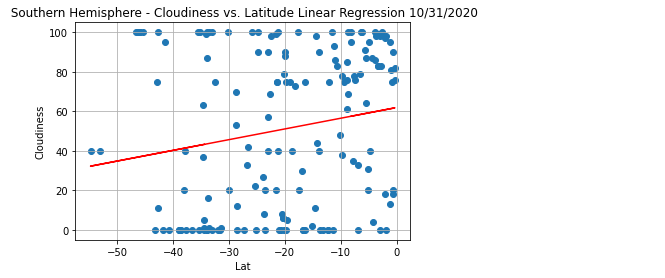

In [193]:
y_value=south_df['Cloudiness']
x_value=south_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept


plt.scatter(x_value,y_value)
plt.plot(x_value,y,"r-")
plt.annotate(line,(23,25),fontsize=15, color='red')
plt.title(" Southern Hemisphere - Cloudiness vs. Latitude Linear Regression " + date)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")



this shows a positive linear regression but there is not a strong relationship between the two variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

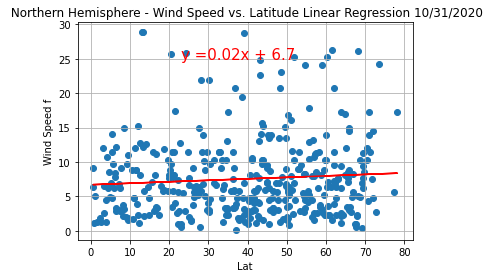

In [194]:
y_value=north_df['Wind Speed']
x_value=north_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept


plt.scatter(x_value,y_value)
plt.plot(x_value,y,"r-")
plt.annotate(line,(23,25),fontsize=15, color='red')
plt.title(" Northern Hemisphere - Wind Speed vs. Latitude Linear Regression " +date)
plt.xlabel('Lat')
plt.ylabel('Wind Speed f')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")



This plot shows a flat slope with much of the data concentrated below 15 windspeed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

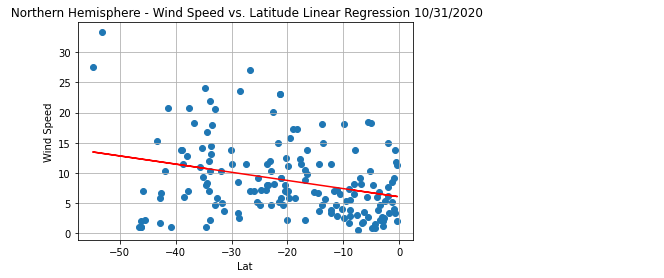

In [195]:
y_value=south_df['Wind Speed']
x_value=south_df['Lat']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept


plt.scatter(x_value,y_value)
plt.plot(x_value,y,"r-")
plt.annotate(line,(23,25),fontsize=15, color='red')
plt.title(" Northern Hemisphere - Wind Speed vs. Latitude Linear Regression " +date )
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.grid()
plt.show
plt.savefig("/Users/kimkockenmeister/Desktop/hw6/upenn-phi-data-pt-09-2020-u-c-master/02-Homework/06-Python-APIs/Instructions/starter_code/ Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")



This plot shows a negative relationship between wind speed and latitude in the Northern Hemisphere.
